# Captain Manny

Anna LH and Maya A: ModSim Project 3


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Question
“If Captain America throws his mighty shield how far away must you be in order to not yield?” Or in simpler terms, how far away from Captain America do you have to be to have no risk of breaking a rib when he throws his shield.


## Method

We based our model off of the Manny Ramirez model. Although we initially wanted to do a frisbee model, we came to the realization that such a model was too difficult to implement in the given time, and that a similar result could be achieved if we just added lift to the Manny Ramirez model. We start off with all the units we need to include, written below. 

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
cm = UNITS.centimeter
radian = UNITS.radian

<Unit('radian')>

This project required a lot of research on Captain America, a fictional character who's been in existence since the 1940s. Because of his long and fictional existence, there are certain things about him and his shield that are somewhat contested. In trying to stay consistent, we implemented numbers closer to the movies than the comic books, since they're at least somewhat more rooted in real physics. For example, our y value is 6 ft, which is the height of Chris Evans, who plays Captain America in his more recent film adaptations. This y value is making the assumption that he's throwing the shield upwards, so that it leaves his hand at approximately his full height, and not the height of his shoulders (which is obviously much more difficult to find). We're using the shield diameter found on the Marvel wiki, and a starting velocity assumed from a Wired article calculating how fast the Winter Soldier throws the shield in the second Captain America film. The article comes to the conclusion that the Winter Soldier throws the shield at 19.5 m/s, and since Captain America is technically stronger than the Winter Soldier, we made the educated guess that he throws the shield sligtly faster, at 20 m/s. The shield is made of vibranium, and because vibranium doesn't exist, it doesn't have to obey physics. The wiki states that the mostly vibranium shield is 12 lbs, or 5.44311 kg. We're ignoring the crazy material properties of vibranium (the movies and comics already do). It's light enough to travel very far, but it won't absorb force (as it's apparently supposed to) since that wouldn't make it an effectibe weapon, and it often not used in the canonical sources. 

In [3]:
params = Params(x = 0 * m, 
                y = 1.8288 * m,
                g = 9.8 * m/s**2,
                mass = 5.44311 * kg,
                diameter = .76 * m,
                rho = 1.23 * kg/m**3,
                C_d = 0.3037506173, C_l = 0.560333,
                angle = 10 * degree,
                velocity = 20 * m / s,
                t_0 = 0 * s,
                t_end = 20 * s)

,values
x,0 meter
y,1.8288 meter
g,9.8 meter / second ** 2
mass,5.44311 kilogram
diameter,0.76 meter
rho,1.23 kilogram / meter ** 3
C_d,0.303751
C_l,0.560333
angle,10 degree
velocity,20.0 meter / second


In [4]:
def make_system(params):

    unpack(params)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = pi * (diameter/2)**2
    
    return System(params, init=init, area=area)

Now, we're calculating our drag force. The coefficient of drag was calculated with an equation we found from a Stanford study on frisbees. Because the ideal angle of attack for frisbees is -4 degrees, we subtracted -4 from our 10 degrees. We then devided the difference by 360, and got .038889. That number is then squared (becoming .00151235) and multiplied by a constant found by the Stanford paper (1.24) to get .00187531. Add that to .15, another constant, and the number comes out to .15187531. That number is then doubled, and the coefficient of drag is found to be .30375062.

In [5]:
def drag_force(V, system):

    unpack(system)
    mag = -rho * (V.mag**2)* (m/s)**2 * C_d * area / 2
    direction = V.hat()
    f_drag = mag * direction
    return f_drag

Lift is similar to drag, but different. While drag force is just the opposite of the shields direction, lift is perpendicular to it. So we made is a vector with the angle and the direction, adding 90 degrees to the angle of the velocity.
The reason we have lift in this model is because the rotation of a frisbee causes it to have lift. 
The coefficient of lift was also calculated using the constants from the Stanford paper. .038889 was multiplied by 2.37, becoming .0921667, and added to .188 (.28016667) then doubled. The coefficient of lift is .5603333.

In [6]:
def lift_force(V, system):

    unpack(system)
    mag =  .5 * C_l * area * rho * (V.mag**2)* (m/s)**2 
    angle = V.angle + (pi / 2) * radian
    x,y = pol2cart(angle, mag)
    f_lift = Vector(x,y)
    return f_lift

The slope function is similar to that of the Manny Ramirez problem, except with lift added to it.

In [7]:
def slope_func(state, t, system):

    x, y, vx, vy = state
    unpack(system)

    V = Vector(vx, vy)    
    a_drag = drag_force(V, system) / mass 
    a_lift = lift_force(V, system) / mass
    a_grav = Vector(0, -g)
  
    
    a = a_grav + a_drag + a_lift
    
    return vx, vy, a.x, a.y

In [8]:
def event_func(state, t, system):

    x, y, vx, vy = state
    return y

For the ODE solver, we had to had to shorten the time step in order to get a smooth plot. 

In [9]:
system = make_system(params)
ts = linrange(system.t_0, system.t_end, .1*s)
results1, details = run_ode_solver(system, slope_func, events=event_func,  t_eval = ts)

In [10]:
velocity_x = results1.vx.get_values()
velocity_y = results1.vy.get_values()

array([ 3.47296355,  3.47379686,  3.39722022,  3.25292909,  3.04945856,
        2.79460532,  2.49542769,  2.15824559,  1.78864052,  1.39145561,
        0.97111356,  0.53166519,  0.07639159, -0.39155369, -0.86913395,
       -1.35342939, -1.8416371 , -2.33107102, -2.81916199, -3.30345774,
       -3.78162285, -4.25162128, -4.71195862, -5.1609762 , -5.59712421,
       -6.01897994])

This is the plot of the trajectory of the shield. It travels up to 4.539959 m, and as far as 35.217181 m before falling.That's 14.894878609 ft at it's highest point, and 115.541932415 ft before it hits the ground. 

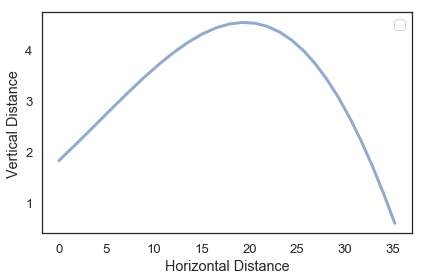

In [11]:
plot(results1.x, results1.y)


decorate(xlabel='Horizontal Distance',
         ylabel='Vertical Distance')

Then, to determine the point at which a person is far enough away to be safe, we calculated the force over the trajectory, and plotted it against the horizontal distance.

In [12]:
resultsF = []
    
for i in linrange(0,velocity_x.size-1):

    # times ten because the velocity change is the result of 
    # just .1s of acceleration, so the acceleration in 1s is 10x as much
    fx = (velocity_x[i] - velocity_x[i+1]) * 10 * mass * m/s**2
    fy = (velocity_y[i] - velocity_y[i+1]) * 10 * mass * m/s**2
    F = Vector(fx,fy)
    f= F.mag
    resultsF.append(f)
#     resultsF[i] = f


fx = (velocity_x[velocity_x.size-2] - velocity_x[velocity_x.size-1]) * 10 * mass * m/s**2
fy = (velocity_y[velocity_y.size-2] - velocity_y[velocity_y.size-1]) * 10 * mass * m/s**2
f = Vector(fx, fy)
f_mag = f.mag
resultsF.append(f_mag)

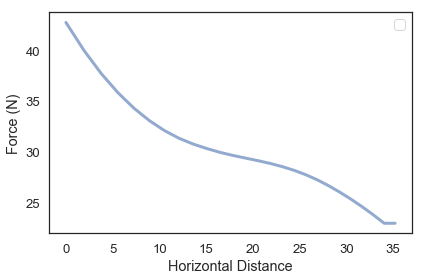

In [16]:
plot(results1.x, resultsF)

decorate(xlabel='Horizontal Distance',
         ylabel='Force (N)')

Because we knew that our level of yeild was 3,300 N, and this model shows force that's significantly less, we decided to calculate the Impulse, and see if our model showed a final velocity high enough to inflict damage. 

## Results

At this point, we decided it would be a good idea to calculate the speed the shield needs to be travelling in order to actually incapacitate someone. We decided to define incapacitation as broken ribs, since there are actual numbers associated with that. It takes 3,300 N of force to break ribs, delivered fairly quickly. We've decided to interpred 'fairly quickly' as 1/5 second. 

 The equation we're using is as follows:
                 
                 F * t = mass * V - mass * Vi
 where Vi is the initial velocity the shield is thrown at.
                 
                 3300 N * .2 s = 5.44311 kg * V - 5.44311 kg * 20 m/s
                 660 Ns = 5.44311 kg * V - 108.8622 kgm/s
                 768.8622 kgm/s = 5.44311 kg * V
                 141.254209 m/s = V

The velocity of the shield is highest when it's first thrown, at 20 m/s. That's no where near fast enough to break a human rib. Still, because the time the impact takes was a complete estimate, we decided to try again, this time with a smaller time frame.

                 3300 N * .1 s = 5.44311 kg * V - 5.44311 kg * 20 m/s
                 330 Ns = 5.44311 kg * V - 108.8622 kgm/s
                 438.8622 kgm/s = 5.44311 kg * V
                 80.6271047 m/s = V

Unfortunately, while this did lesen the gap between the velocity we would need and the one we had, it is still nowhere near a physical possibility.

## Interpretation

Any impact time smaller than .1 seconds seemed implausable. So we came to the conclusion that it is physically impossible for Captain America to make anyone yeild when he throws his mighty shield.
This, to be fair, is a conclusion we came to after a lot of assumptions. For starters, what defines yeilding? We assumed that Captain America is only fighting dangerous, strong, and scary opponents, who can take a hit. In other words, we assumed that the kind of people he threw shields at were too resilient to get knocked down unless they broke a bone. Even if we did decide to go with something lighter, yielding is so subjective that it would have been impossible to find a value for it. 
We are also using a point mass to represent the shield. The flight pattern of the shield might be different from our model. It's also worth noting that in the movies we're basing our model off of, Captain America throws his shield like a discus, which might have affected things as well. 
He also might throw the shield a lot faster or slower than our assumption. Captain America is, again, a fictional character. We had assumed this data would be easy to come by, since he is a beloved character with a lot of adoring fans and writers who, we thought, would have already some up with these numbers. 
There was also the material properties of vibranium that we, like every author and screenwriter, chose to do away with. Vibranium is supposed to absorb kinetic energy. However, that is rarely shown in Captain America's shield (possibly becuase it's a Vibranium-Adamntium steel alloy, and not pure vibranium), unless he's actually using it as a shield for once. 
As it stands, even despite all of our assumptions, it seems Captain America's mighty shield can only really be useful as a shield - and it definitely can't make his enemies yield.